In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

/home/codespace/.local/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Homework 6: Probability, Simulation, Estimation, and Assessing Models

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/su24/reference/): Cheat sheet of helpful array & table methods used in Data 8!
- [Sampling Methods Guide](https://drive.google.com/file/d/1k8uNN0Bg7J0BTgK-0Z5glDNtd_5FTJQl/view?usp=sharing): Guide for the randomization methods.

**Recommended Readings**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

## 1. Roulette

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.** Below is an example of a roulette wheel!

<img src="roulette_wheel.jpeg" width="330px">

Run the cell below to load the `wheel` table.

In [3]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red ###
If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- If the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

**Question 1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer.

*Note:* You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.


In [5]:
def dollar_bet_on_red(color):
    if color == 'red':
        return 1 
    else: 
        return -1 

In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Run the cell below to make sure your function is working.

In [7]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


**Question 2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. Your code should use the function `dollar_bet_on_red`.

> *Hint:* You should not need a `for` loop for this question, instead try using a table method!

In [10]:
red_winnings = wheel.apply(dollar_bet_on_red, 'Color')
wheel = wheel.with_column('Winnings: Red', red_winnings)
wheel


Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [11]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Simulating 10 Bets on Red
Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

**Question 3.** Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. Your table should have the same three column labels as in `wheel`. Once you've created that table, set `sum_bets` to your net gain in all 10 bets, assuming that you bet one dollar on red each time.

*Hint:* It may be helpful to print out `ten_bets` after you create it! 

In [12]:
ten_bets = wheel.sample(10)
sum_bets = sum(ten_bets.column('Winnings: Red'))
sum_bets

2

In [13]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

**Question 4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain in that number of one-dollar bets on red.

*Hint:* You should use your `wheel` table within your function and run the simulation like the in previous question.


In [14]:
def net_gain_red(num_bets):
    ten_bets = wheel.sample(num_bets)
    sum_bets = sum(ten_bets.column('Winnings: Red'))
    return sum_bets

In [15]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Run the cell below a few times to make sure that the results are similar to those you observed in the previous exercise.

In [16]:
net_gain_red(10)

-6

**Question 5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `simulated_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red.

*Hint:* Think about which computational tool might be helpful for simulating a process multiple times. Lab 5 might be a good resource to look at!

*Note:* This cell might take a few seconds to run.


In [18]:
num_bets = 200
repetitions = 10000

simulated_gains_red = make_array()
for i in np.arange(repetitions):
    gain = net_gain_red(num_bets)
    simulated_gains_red = np.append(simulated_gains_red, gain)

len(simulated_gains_red) # Do not change this line! Check that simulated_gains_red is length 10000.

10000

In [19]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Run the cell below to visualize the results of your simulation.

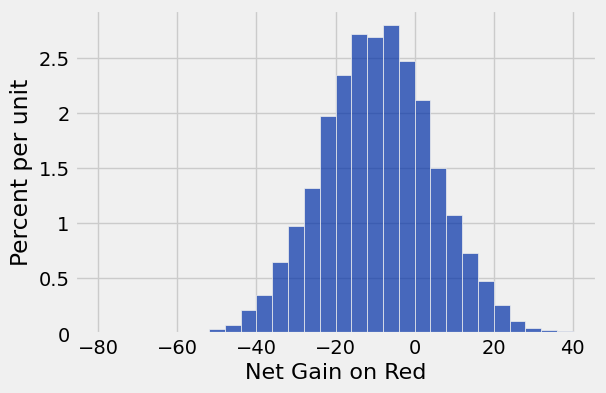

In [20]:
gains = Table().with_columns('Net Gain on Red', simulated_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

**Question 6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question. **(2 points)**


In [22]:
loss_more_than_50 = False

In [23]:
grader.check("q1_6")

q1_6 results: All test cases passed!

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

**Question 7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split.

*Hint:* Remember that the pockets are represented as strings.


In [24]:
def dollar_bet_on_split(pocket):
    if pocket =='5' or pocket== '6': 
        return 17
    else:
        return -1 

In [25]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Run the cell below to check that your function is doing what it should.

In [26]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


**Question 8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split.


In [28]:
split_winnings = wheel.apply(dollar_bet_on_split, 'Pocket')
wheel = wheel.with_column('Winnings: Split', split_winnings)
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


In [29]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `simulated_gains_split`.

*Hint:* Your code in Questions 4 and 5 may be helpful here!


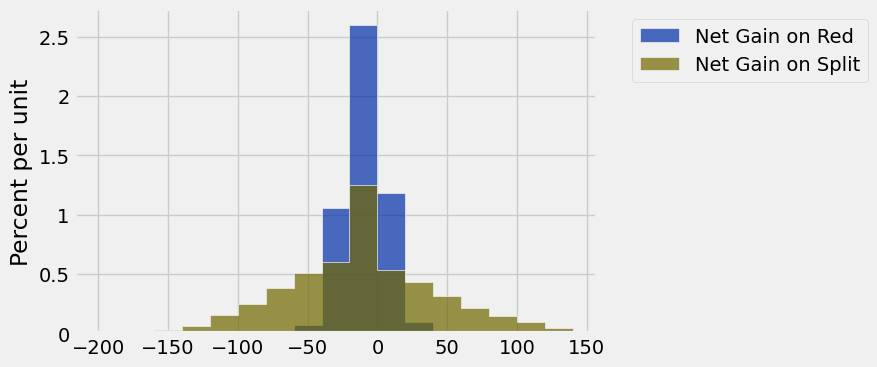

In [31]:
simulated_gains_split = make_array()

for i in np.arange(repetitions):
    bets= wheel.sample(num_bets)
    gain= sum(bets.column('Winnings: Split'))
    simulated_gains_split= np.append(simulated_gains_split, gain)
                          

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', simulated_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

In [32]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 10.** Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram.

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

*Hint:* We've already seen one of these statements in a prior question.


In [38]:
histogram_statements = make_array(1,3)

In [39]:
grader.check("q1_10")

q1_10 results: All test cases passed!

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

<!-- END QUESTION -->

## 2. Assessing Jade's Models

Before you begin, [Section 10.4](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html) of the textbook is a useful reference for this part.

### Games with Jade
Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

**Question 1.** Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1.


In [40]:
deck_model_probabilities = make_array(4/13, 9/13)
deck_model_probabilities

array([ 0.30769231,  0.69230769])

In [41]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 2.** We believe Jade's model is incorrect. In particular, we believe there to be a *larger* chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer.

1. The distance (absolute value) between the actual number of face cards in 13 draws and 4, the expected number of face cards in 13 draws
2. The expected number of face cards in 13 draws
3. The number of face cards we get in 13 draws


In [42]:
statistic_choice = 3
statistic_choice

3

In [43]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 3.** Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the **number of face cards** in one simulation of drawing cards under the model specified in `model_proportions`.

*Hint:* Think about how you can use the function `sample_proportions`. 


In [44]:
def deck_simulation_and_statistic(sample_size, model_proportions):
    draw = sample_proportions(sample_size, model_proportions)
    return sample_size * draw.item(0)

deck_simulation_and_statistic(13, deck_model_probabilities)

1.0

In [45]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.** Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`.


In [46]:
repetitions = 5000 
deck_statistics= make_array()
for i in  np.arange(repetitions):
    result= deck_simulation_and_statistic(13, deck_model_probabilities)
    deck_statistics= np.append(deck_statistics,result)

deck_statistics

array([ 4.,  4.,  3., ...,  6.,  5.,  4.])

In [47]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Let’s take a look at the distribution of simulated statistics.

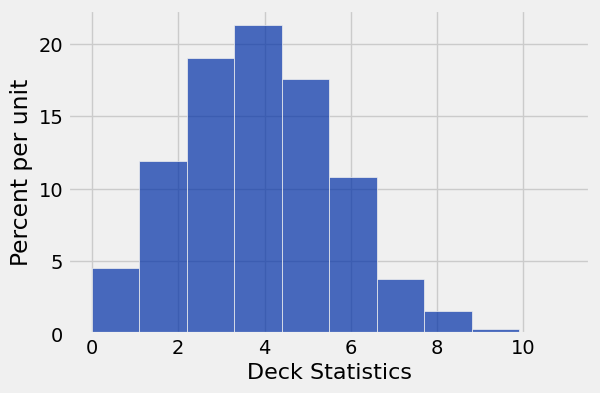

In [48]:
# Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

<!-- BEGIN QUESTION -->

**Question 5.** Given your observed value, do you believe that Jade's model is reasonable, or is our alternative (that our deck is rigged) more likely? Explain your answer using the histogram of statistics simulated using Jade's model (produced above).


_Yes I do because it has a consitent bell curve._